<a href="https://colab.research.google.com/github/stanislav215/computer_vision/blob/master/cviko2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#TODO:
# Základné operácie s obrazmi v knihe od strany 10 po stranu 16
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, io, transform
from scipy import signal

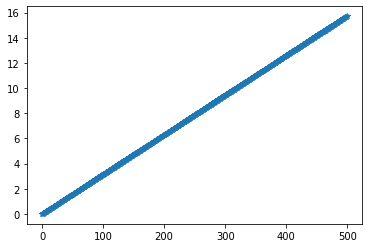

In [11]:
x = np.linspace(0, 5*np.pi, 500)
plt.plot(x,"*-")

Text(0.5, 1.0, 'Kartenzianska sustava hodnot vektora Y')

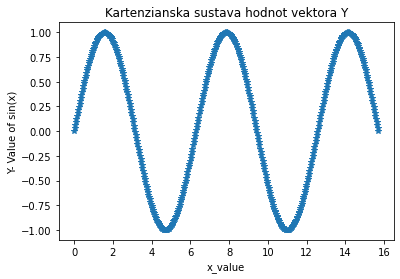

In [12]:
plt.figure()
y = np.sin(x)
plt.plot(x, y,"*-")
plt.ylabel("Y- Value of sin(x)")
plt.xlabel("x_value")
plt.title('Kartenzianska sustava hodnot vektora Y')

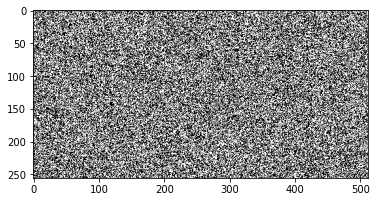

In [14]:
plt.figure()
rand_img = np.random.rand(256, 512)
plt.imshow(rand_img>0.5,cmap='gray')

Text(0.5, 1.0, 'Lena in RGB')

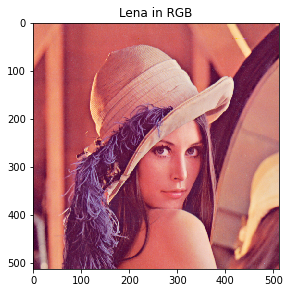

In [108]:
image = io.imread("./imgs/lena.png")
fig, ax = plt.subplots()
io.imshow(image) 
plt.title('Lena in RGB')

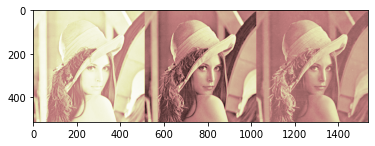

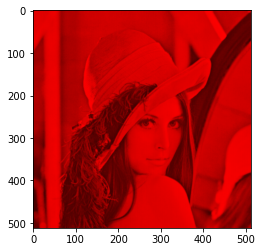

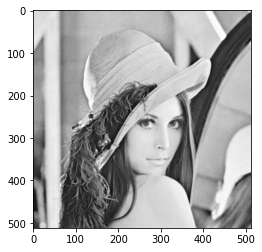

In [46]:
plt.figure()
plt.imshow(np.concatenate((image[:,:,0], image[:,:,1], image[:,:,2]),1),cmap='pink')
image_R = np.array(image)
image_R[:,:,1:] = 0
plt.figure()
plt.imshow(image_R)
plt.figure()
img = image_R[:,:,0].astype(dtype=np.uint8)
plt.imshow(image[:,:,0],cmap='gray')

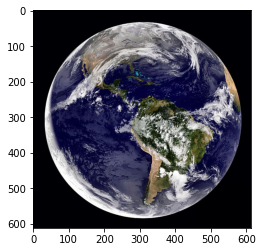

In [ ]:
image_earth = io.imread("imgs/earth.jpg")
fig = plt.figure()
ax = fig.add_subplot(111)
plt.imshow(image_earth)
ax.set_aspect('equal')

In [41]:
image_earth = io.imread("imgs/earth.jpg")
i_gray = 0.2126 * image_earth[:,:,0] + 0.7152 * image_earth[:,:,1] + 0.0722 * image_earth[:,:,2]
i_gray = i_gray.astype(dtype=np.uint8)

Prevod RGB na šedotónovy obrázok

Sum error between methods:  3853
Average error:  0.01028717587252766


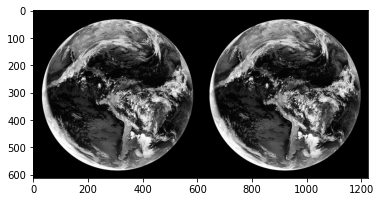

In [64]:
from skimage.color import rgb2gray
#Y = 0.2125 R + 0.7154 G + 0.0721 B scikit
i_gray2 = (rgb2gray(image_earth)*255).astype(dtype=np.uint8)
print("Sum error between methods: ", np.sum((i_gray2 -i_gray)**2))
print("Average error: ", np.sum((i_gray2 -i_gray)**2)/i_gray2.size)

plt.figure()
plt.imshow(np.concatenate((i_gray, i_gray2),1),cmap="gray")

Zmena veľkosti obrázka na 50% pôvodnej

(512, 512, 3)
(256, 256, 3)


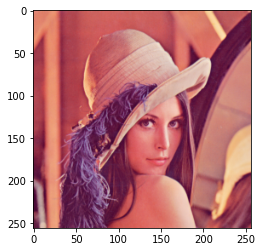

In [69]:
print(image.shape)
new_shape = (image.shape[0],image.shape[1])
I_resized = transform.resize(image, np.array(new_shape)*0.5)
print(I_resized.shape)
plt.figure()
plt.imshow(I_resized)

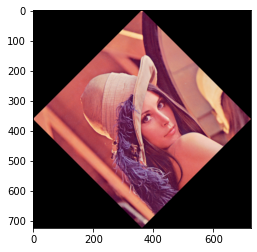

In [45]:
 I_rotated = transform.rotate(image,45,resize=True)
plt.figure()
plt.imshow(I_rotated)

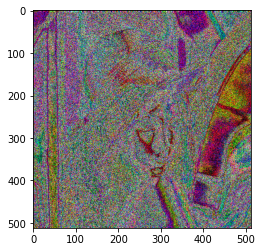

In [70]:
plt.figure()
plt.imshow(image**2)

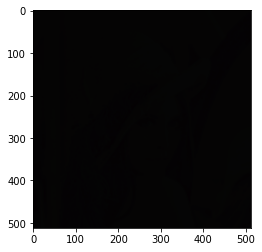

In [214]:
plt.figure()
i_log = image.astype(np.float)
i_log = np.log(i_log)
i_log = i_log.astype(np.uint8)
plt.imshow(i_log)

Text(0.5, 1.0, 'Convolved image')

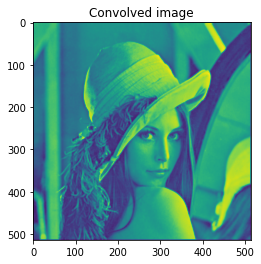

In [71]:
 plt.figure()
g = np.array(np.array([[1, 2, 1]]) * np.array([[1], [2], [1]]) / 16);
plt.imshow(signal.convolve2d(rgb2gray(image),g))
plt.title('Convolved image')

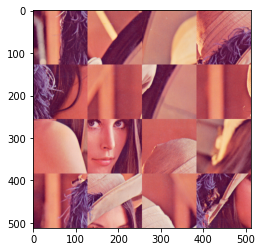

In [213]:
img_shape_x, img_shape_y = image.shape[0], image.shape[1]
x_mriezka, y_mriezka = 4,4
new_image = np.zeros(shape = (image.shape), dtype = int)
w_small = int(img_shape_x/x_mriezka)
h_small = int(img_shape_y/y_mriezka)
small_images = []

for i in range(x_mriezka):
    for j in range(y_mriezka):
        small_images.append(image[(w_small*i):(w_small*(i+1)),(h_small*j):(h_small*(j+1))])  

import random
random.shuffle(small_images)

counter = 0
for i in range(x_mriezka):
    for j in range(y_mriezka):
        new_image[(w_small*i):(w_small*(i+1)),(h_small*j):(h_small*(j+1))] = small_images[counter]
        counter = counter + 1

plt.imshow(new_image)